## Exercise 1: The Driven Pendulum
Aim: to explore the physics of non-linear oscillator by accurate integration of its equation of motion.

### Core task 1

First, re-write the second-order differential equation into a pair of linked 1st order equations by letting $y_0 = \theta$ and $y_1 = \dot{\theta}$:
$$ 
\dot{y}_0 = y_1\\
\dot{y}_1 = -\sin(y_0) - qy_1 + F\sin(\Omega_D t)
$$
where $q = \frac{\alpha}{ml}$ and $F = \frac{G}{ml^2}$. Taking $l=g$ and $\Omega = 2/3$ rad s $^{-1}$. Initial conditions, at $t=0, y_1=0$


In [21]:
# Import relevant modules and libraries #
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate 


Omega_D = 2/3 # Driving frequency
T = 2 * np.pi # Period of small oscialltions

def derivatives(t, y, q,  F, Omega_D):
    return [y[1], -1 * np.sin(y[0]) - q * y[1] + F * np.sin(Omega_D * t)]

# Define parameters
y0 = (0.01, 0.0) # Initial conditions
q, F = 0, 0
powers = 3
periods = [10**i for i in range(1, powers+1)]

solutions = {}
for period in periods:
    solution = scipy.integrate.solve_ivp(fun = derivatives,
                                        t_span = (0, period*T),
                                        y0 = y0,
                                        args = (q,F,Omega_D),
                                        t_eval=np.arange(0, period*T, 0.01))
    solutions[period] = [solution.t, solution.y[0], solution.y[1]]    

def theoretical_solution(t):
    return [y0[0] * np.cos(t), -y0[0] * np.sin(t)]

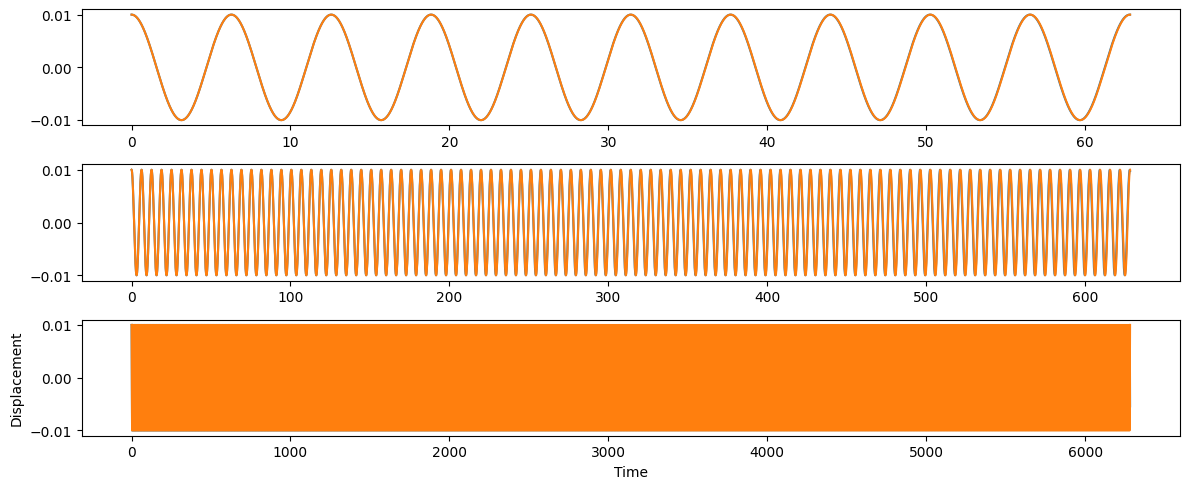

In [26]:
# Plot of displacement vs time #
plt.figure(figsize=(12,5))

for i in range(1,powers+1):
    plt.subplot(powers,1,i)
    t = solutions[periods[i-1]][0]
    theta = solutions[periods[i-1]][1]
    omega = solutions[periods[i-1]][2]
    plt.plot(t, theta, label='Numerical solution')
    plt.plot(t, theoretical_solution(t)[0])
   

plt.xlabel('Time')
plt.ylabel('Displacement')
plt.tight_layout()
plt.show()

Testing conservation of energy:

$$ \text{Total energy} = \text{Kinetic energy} + \text{Gravitational potential energy} \\
= \frac{1}{2}ml^2 \omega^2 + mgl(1-\cos \theta)\\
= \frac{1}{2}ml^2(\omega^2 + 2 - 2\cos\theta)
$$ 

Therefore, the total energy of the pendulum is proportional to $\omega^2 + 2 - 2\cos\theta$, where I have used $l=g$.



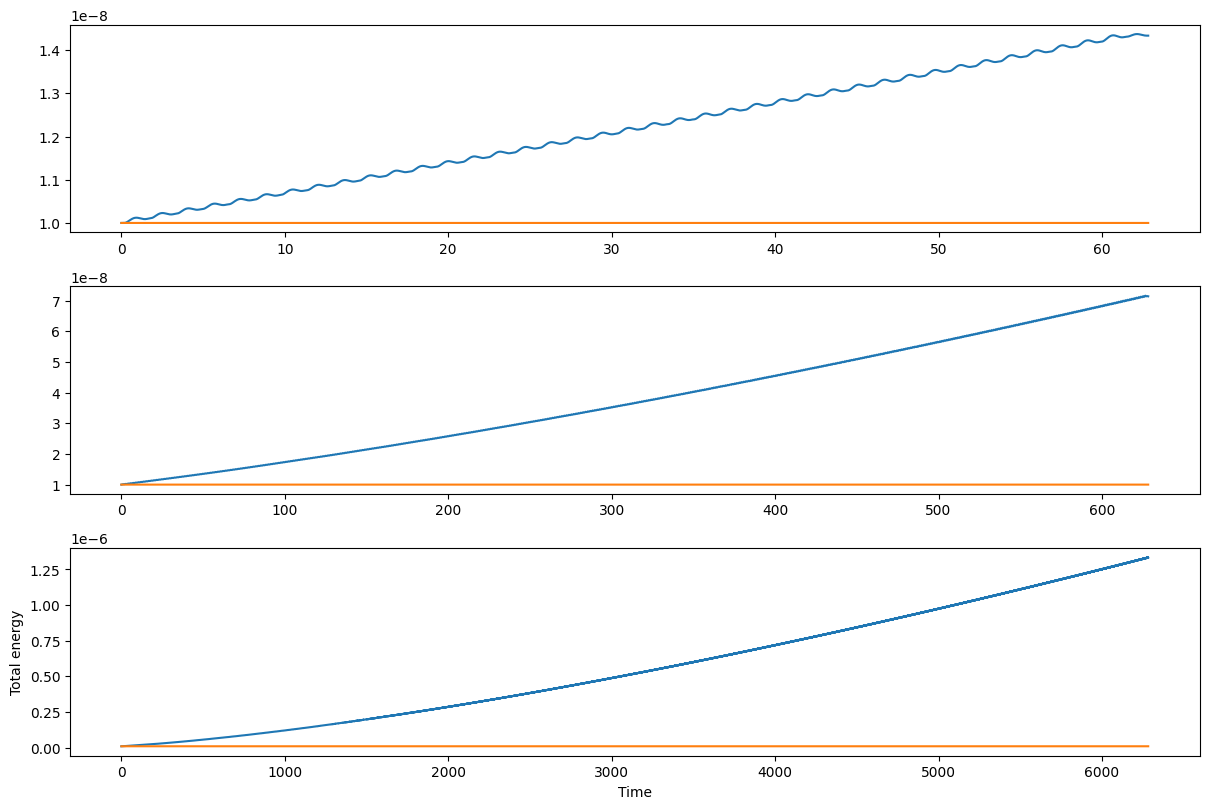

In [16]:
# Plot of total energy vs time #
plt.figure(figsize=(12,8))

for i in range(1,powers+1):
    plt.subplot(powers,1,i)
    t = solutions[periods[i-1]][0]
    theta = solutions[periods[i-1]][1]
    omega = solutions[periods[i-1]][2]
    analytical_solution = theoretical_solution(t)
    plt.plot(t, omega**2 + 2 - 2 * np.cos(theta))
    plt.plot(t, analytical_solution[1]**2 + 2 - 2 * np.cos(analytical_solution[0]))

plt.tight_layout()
plt.xlabel('Time')
plt.ylabel('Total energy')
plt.show()

In [27]:
# Investigate period v.s. initial displacement, theta_0 #

y0 = (0.01, 0.0) # Initial conditions
q, F = 0, 0
powers = 3
periods = [10**i for i in range(1, powers+1)]

solutions = {}
for period in periods:
    solution = scipy.integrate.solve_ivp(fun = derivatives,
                                        t_span = (0, period*T),
                                        y0 = y0,
                                        args = (q,F,Omega_D),
                                        t_eval=np.arange(0, period*T, 0.001))
    solutions[period] = [solution.t, solution.y[0], solution.y[1]]    

def theoretical_solution(t):
    return [y0[0] * np.cos(t), -y0[0] * np.sin(t)]


TypeError: only size-1 arrays can be converted to Python scalars

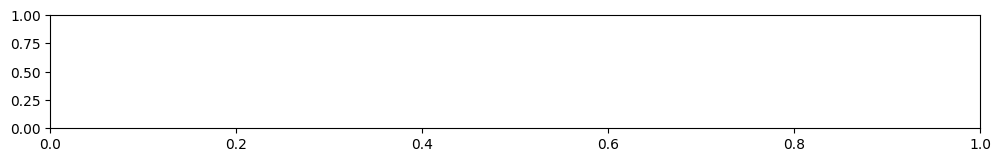

In [33]:
# Plot of displacement vs time #
plt.figure(figsize=(12,5))

for i in range(1,powers+1):
    plt.subplot(powers,1,i)
    t = solutions[periods[i-1]][0]
    theta = solutions[periods[i-1]][1]
    omega = solutions[periods[i-1]][2]
    theta_fft = np.fft.fft(theta)
    f = np.fft.fftfreq(int(t), 0.001) 
    plt.plot(f, abs(theta_fft))
   
    plt.plot(t, theta, label='Numerical solution')
    plt.plot(t, theoretical_solution(t)[0])


plt.xlabel('Time')
plt.ylabel('Displacement')
plt.tight_layout()
plt.show()

### Conclusions

Some brief words here about what you did and what you achieved in this task.

Any numerical results should be stated here.


Fractional error dominate with small values of initial parameters used.